In [6]:
from utilities.circuit_basics import Evaluator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [7]:
ground = np.genfromtxt('xxz.csv',delimiter=',')
js,ans = ground[:,0], ground[:,1]

In [8]:
ground

array([[-1.1       , -7.4       ],
       [-0.98421053, -6.93684211],
       [-0.86842105, -6.47368421],
       [-0.75263158, -6.01052632],
       [-0.63684211, -5.54736842],
       [-0.52105263, -5.5       ],
       [-0.40526316, -5.5       ],
       [-0.28947368, -5.5       ],
       [-0.17368421, -5.5       ],
       [-0.05789474, -5.54224969],
       [ 0.05789474, -5.77382864],
       [ 0.17368421, -6.014878  ],
       [ 0.28947368, -6.26535045],
       [ 0.40526316, -6.52515254],
       [ 0.52105263, -6.79414693],
       [ 0.63684211, -7.07215569],
       [ 0.75263158, -7.35896431],
       [ 0.86842105, -7.65432641],
       [ 0.98421053, -7.95796874],
       [ 1.1       , -8.26959636]])

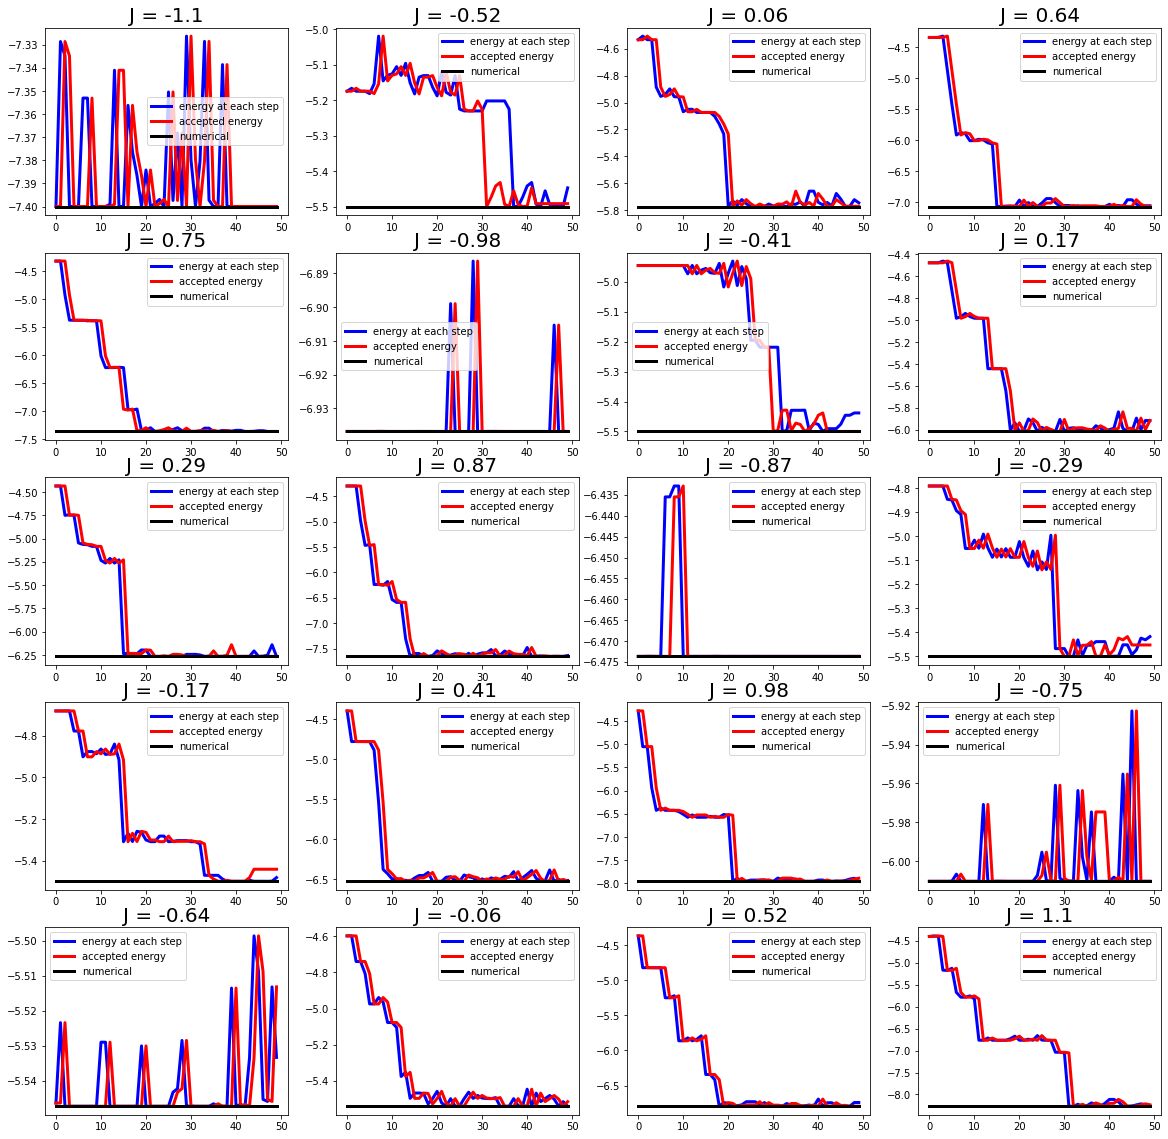

In [10]:
lw=3
plt.figure(figsize=(20,20))
for ind,j in enumerate(np.linspace(-1.1,1.1,20)): 
    axs={ind:plt.subplot2grid((5,4),(ind%5,ind%4))}
    nrun_load = int(len(glob("xxz/4Q - J {} g 0.75/*".format(j)))-2)    
    evaluator = Evaluator(loading=True, args={"n_qubits":4, "J":j, "g":0.75,"problem":"xxz"},nrun_load=nrun_load)
    raw=[]
    evolution=[]
    not_added=0
    lowest = []
    for k in range(len(list(evaluator.raw_history.keys()))-1):
        raw.append(evaluator.raw_history[k][1])
        lowest.append(evaluator.raw_history[k][-1])
        if k>0:
            if not_added < len(list(evaluator.evolution.keys())):
                if evaluator.evolution[not_added] != evaluator.raw_history[k]:
                    evolution.append(evaluator.evolution[not_added][1])
                    not_added+=1
                else:
                    evolution.append(evolution[-1])
            else:
                evolution.append(evolution[-1])
        else:
            evolution.append(evaluator.evolution[k][1])
    axs[ind].set_title("J = {}".format(np.round(j,2)),size=20)
    axs[ind].plot(raw, label="energy at each step",color="blue", linewidth=lw)
    axs[ind].plot(evolution, label="accepted energy", color="red", linewidth=lw)
    axs[ind].plot([ans[ind]]*len(raw),label="numerical", color="black", linewidth=lw)
    axs[ind].legend()
plt.savefig("plotting_history_energies.png")